<a href="https://colab.research.google.com/github/Akolibob/Classification-of-Guitar-Pickups-by-Timbre/blob/main/electric_guitar_pickup_classification_by_timbre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraction 1

In [ ]:
# Install necessary libraries
#!pip install librosa
#!pip install sklearn
#!pip install pandas
!pip install mir_eval

import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
#===========
import seaborn as sns
import matplotlib.pyplot as plt
#===========
from sklearn.model_selection import cross_val_score
import os
import mir_eval
from sklearn.feature_selection import SelectKBest, chi2
#===========



# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the audio files
audio_path = "drive/MyDrive/Guitar Pickup Audio Files/Clean/"

# Define the labels
labels = ["Bridge", "Middle", "Neck"]

# Initialize lists to store features and labels
features = []
labels_list = []
feature_names = []

# Iterate through the labels and extract features
for label in labels:
  label_path = audio_path + label + "/"
  for file in os.listdir(label_path):
    if file.endswith(".wav"):
      file_path = label_path + file
      y, sr = librosa.load(file_path)

      # Extract timbre features
      spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
      spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
      spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
      zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
      mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
      chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
      chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
      chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
      spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
      spectral_flatness = librosa.feature.spectral_flatness(y=y)
      tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

      # Calculate mean and standard deviation of features
      feature_vector = [
        np.mean(spectral_centroid),
        np.std(spectral_centroid),
        np.mean(spectral_bandwidth),
        np.std(spectral_bandwidth),
        np.mean(spectral_rolloff),
        np.std(spectral_rolloff),
        np.mean(zero_crossing_rate),
        np.std(zero_crossing_rate),
        np.mean(chroma_stft),
        np.std(chroma_stft),
        np.mean(chroma_cens),
        np.std(chroma_cens),
        np.mean(chroma_cqt),
        np.std(chroma_cqt),
        np.mean(spectral_contrast),
        np.std(spectral_contrast),
        np.mean(spectral_flatness),
        np.std(spectral_flatness),
        np.mean(tonnetz),
        np.std(tonnetz),
      ]

      if not feature_names:
        feature_names = [
          "spectral_centroid_mean",
          "spectral_centroid_std",
          "spectral_bandwidth_mean",
          "spectral_bandwidth_std",
          "spectral_rolloff_mean",
          "spectral_rolloff_std",
          "zero_crossing_rate_mean",
          "zero_crossing_rate_std",
          "chroma_stft_mean",
          "chroma_stft_std",
          "chroma_cens_mean",
          "chroma_cens_std",
          "chroma_cqt_mean",
          "chroma_cqt_std",
          "spectral_contrast_mean",
          "spectral_contrast_std",
          "spectral_flatness_mean",
          "spectral_flatness_std",
          "tonnetz_mean",
          "tonnetz_std",
        ]

      for i in range(mfccs.shape[0]):
        feature_vector.append(np.mean(mfccs[i]))
        feature_vector.append(np.std(mfccs[i]))
        if len(feature_names) < 46:
          feature_names.append(f"mfcc{i+1}_mean")
          feature_names.append(f"mfcc{i+1}_std")

      # Append features and labels to lists
      features.append(feature_vector)
      labels_list.append(label)

# Create a pandas DataFrame from the features and labels
df = pd.DataFrame(features, columns = feature_names)
df["label"] = labels_list

# Save the DataFrame to a CSV file
# df.to_csv("drive/MyDrive/Guitar Pickup Audio Files/Clean/audio_features.csv", index=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Train 1

In [ ]:
# Load the data from the CSV file
df1 = pd.read_csv("drive/MyDrive/Guitar Pickup Audio Files/Clean/audio_features.csv")

# Split the data into training and testing sets
X = df1.drop("label", axis=1)
y = df1["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# Create a kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, normalize='true'))
print(classification_report(y_test, y_pred))


[[27  5  4]
 [ 3 19  0]
 [ 3  0 22]]
[[0.75       0.13888889 0.11111111]
 [0.13636364 0.86363636 0.        ]
 [0.12       0.         0.88      ]]
              precision    recall  f1-score   support

      Bridge       0.82      0.75      0.78        36
      Middle       0.79      0.86      0.83        22
        Neck       0.85      0.88      0.86        25

    accuracy                           0.82        83
   macro avg       0.82      0.83      0.82        83
weighted avg       0.82      0.82      0.82        83



# Plot 1



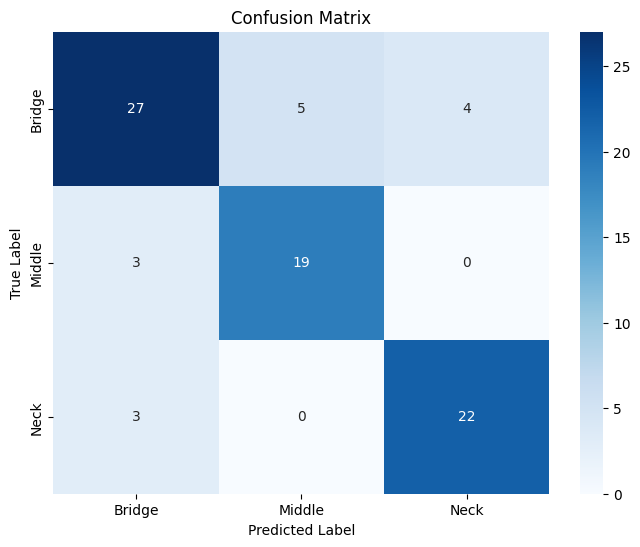

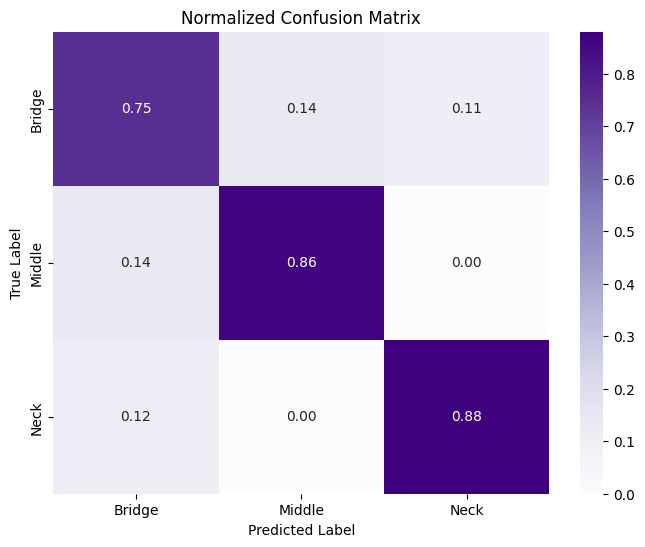

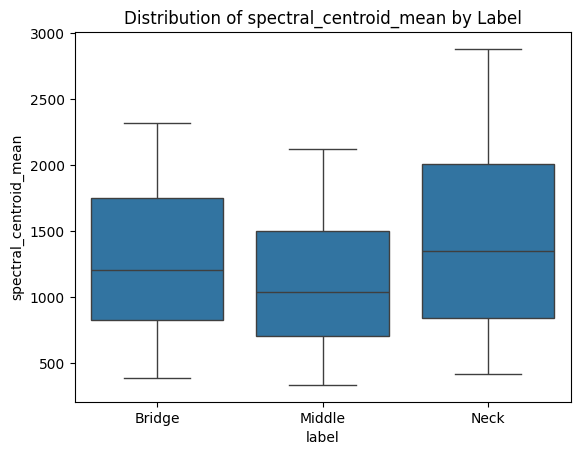

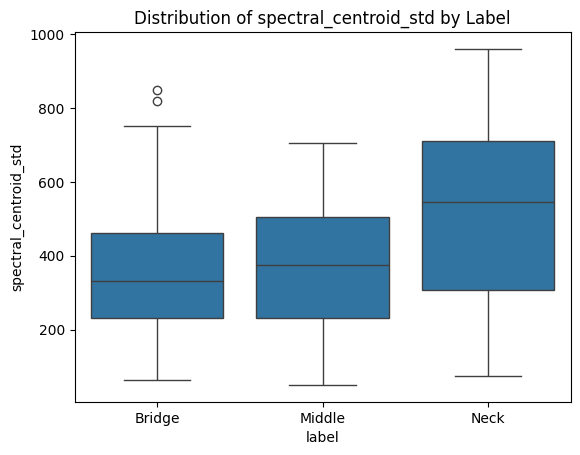

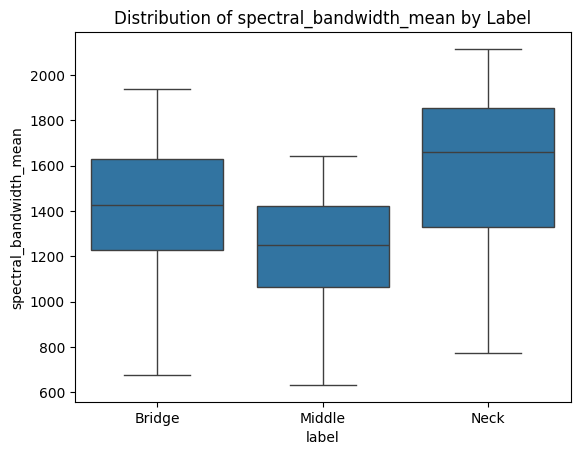

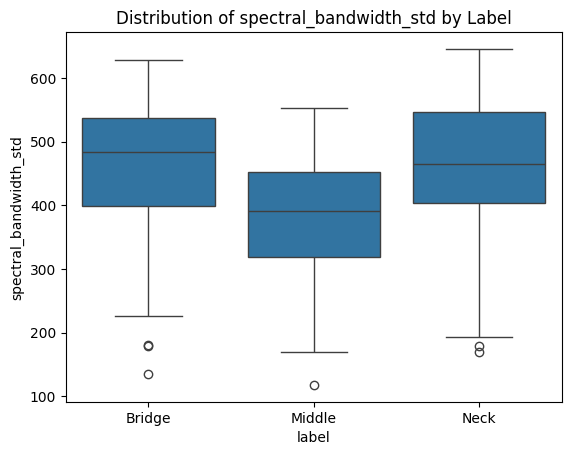

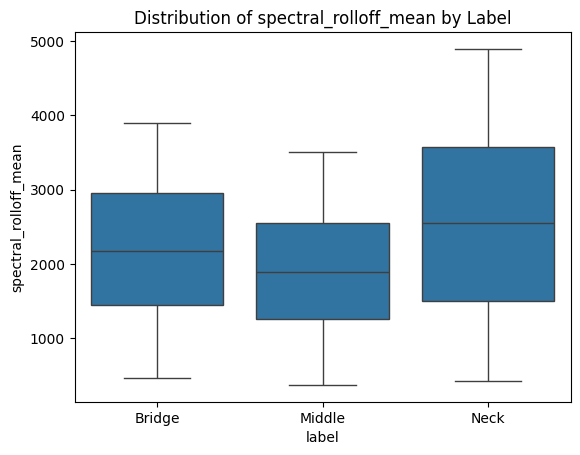

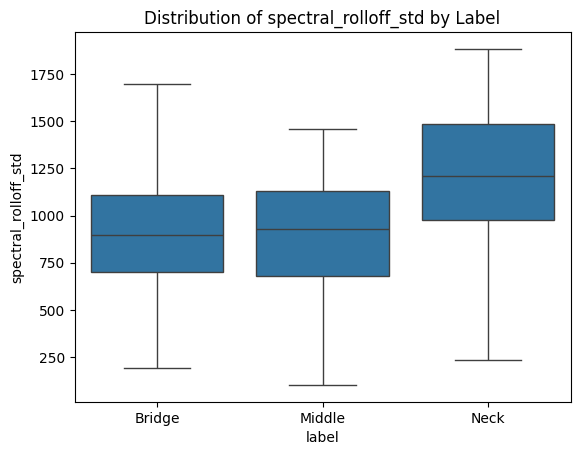

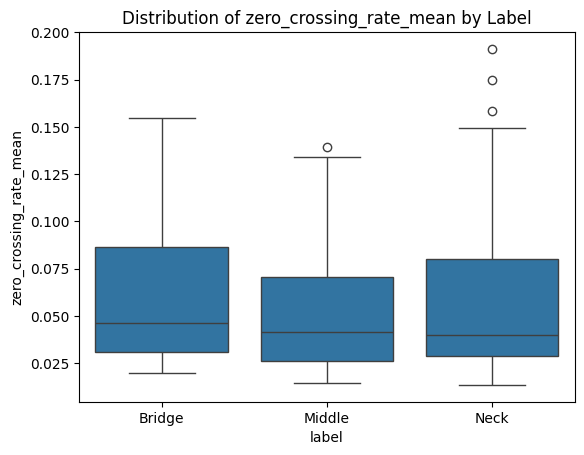

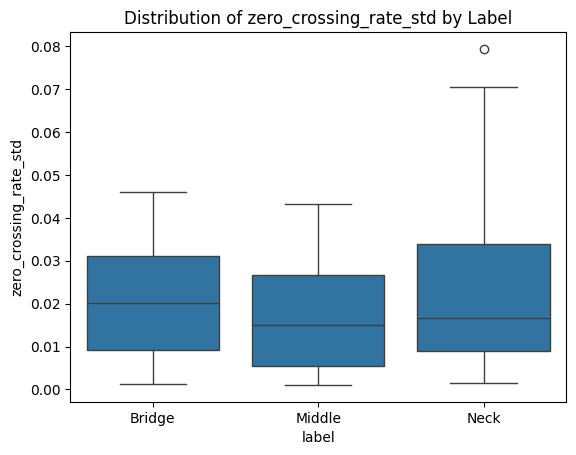

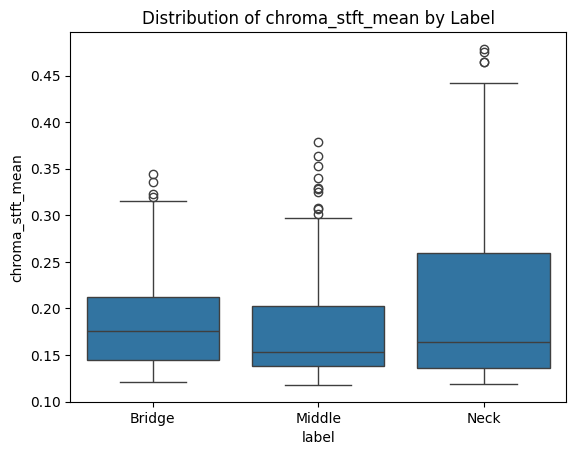

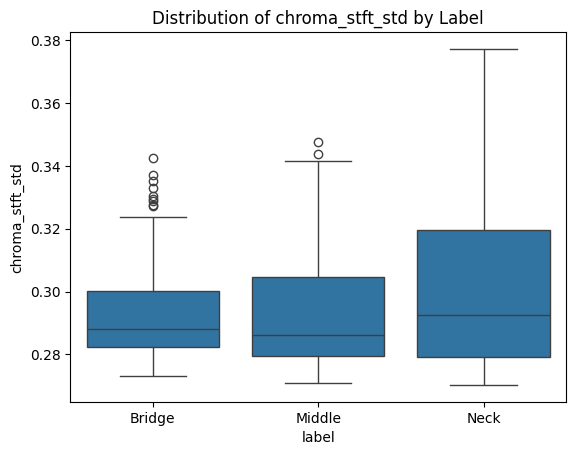

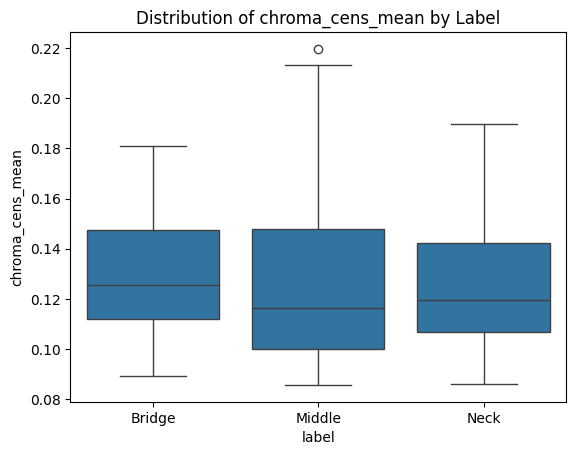

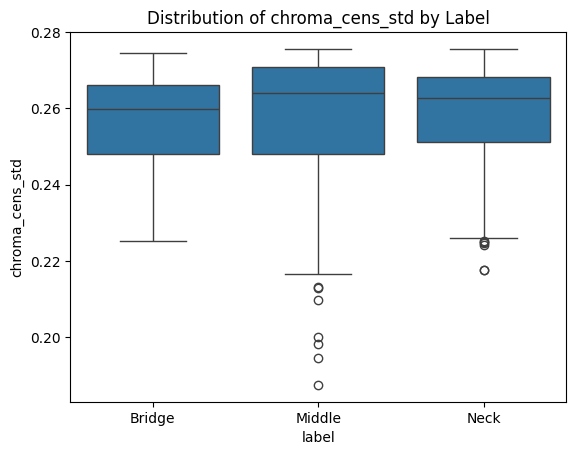

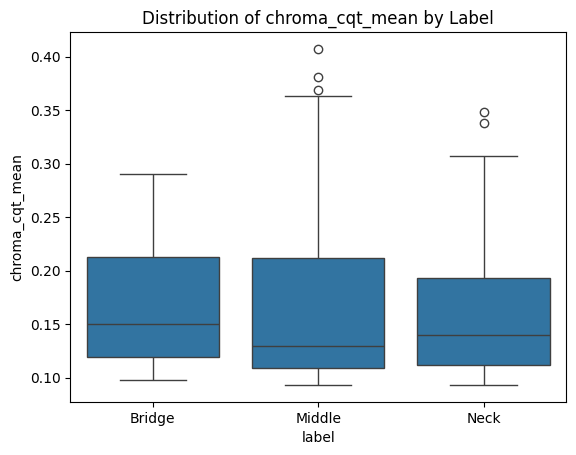

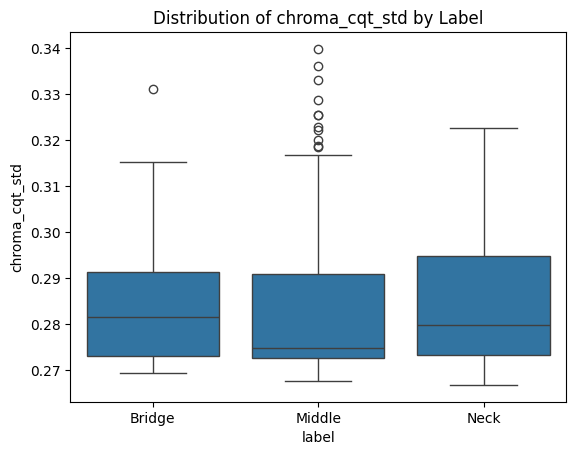

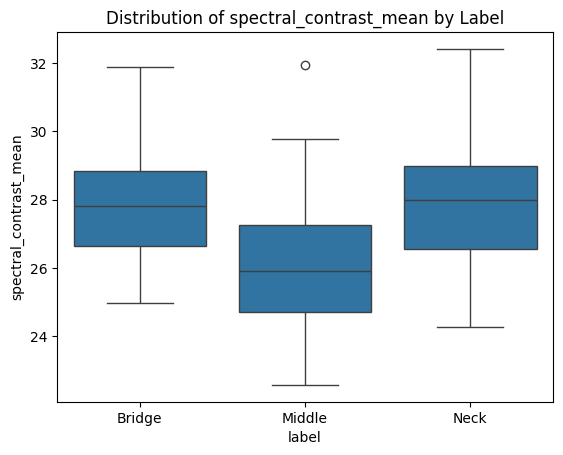

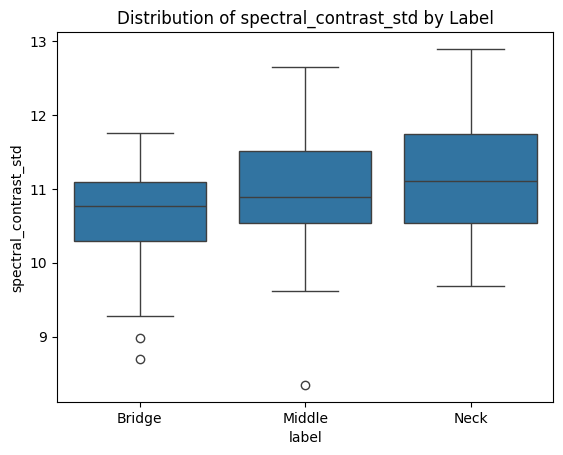

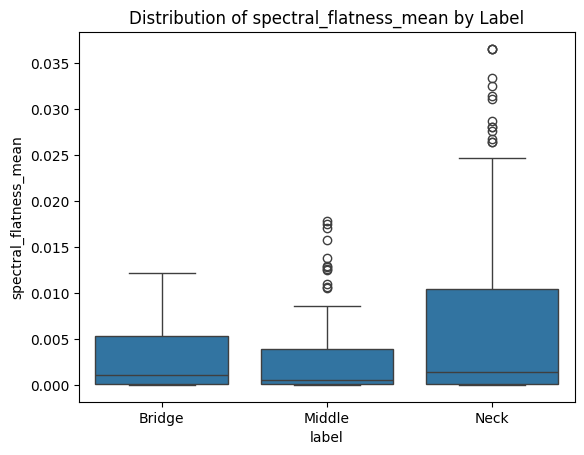

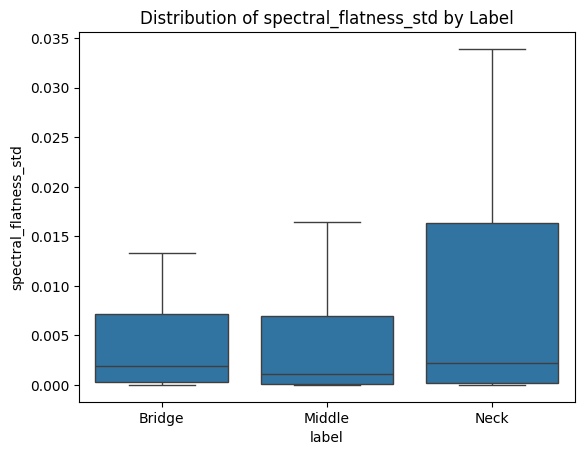

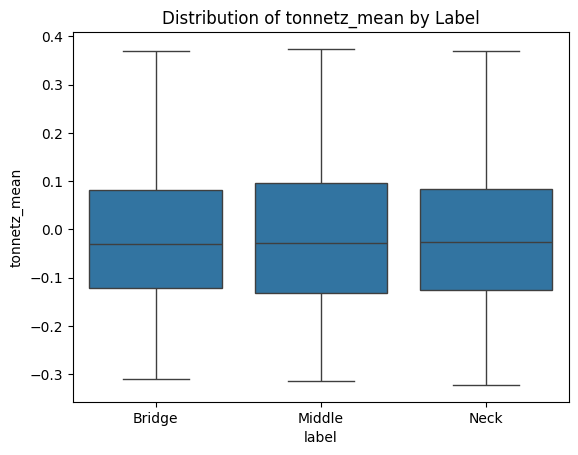

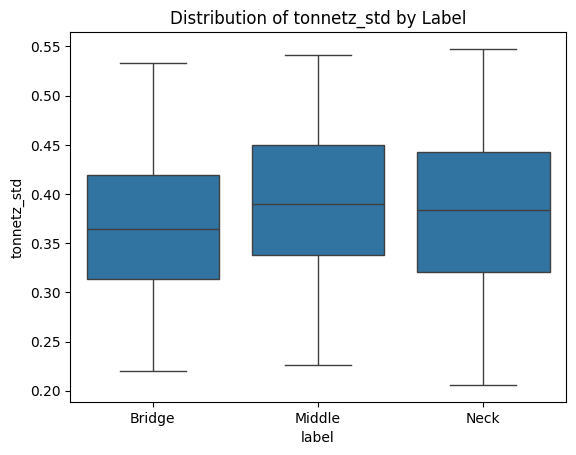

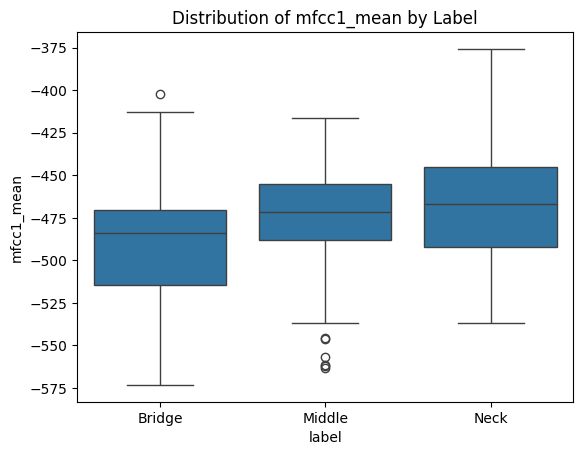

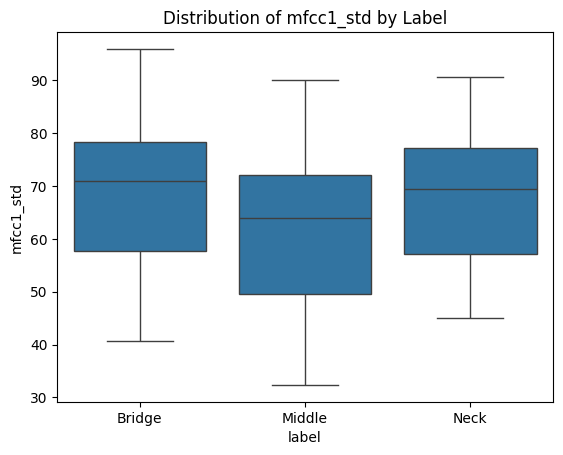

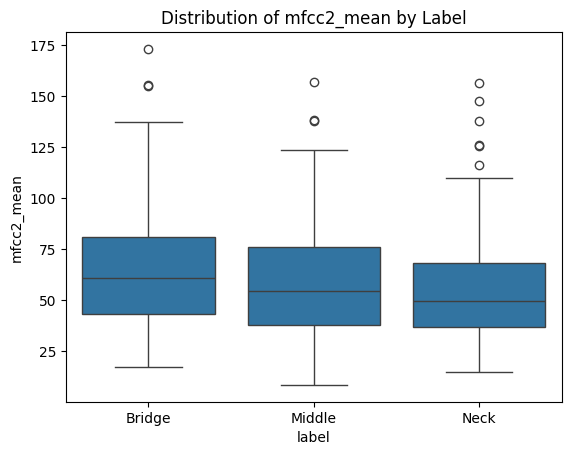

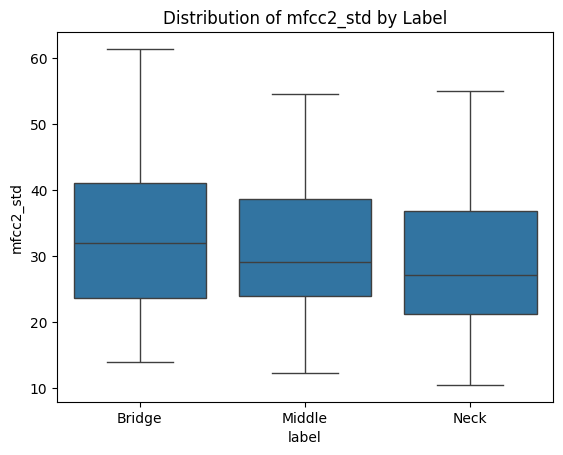

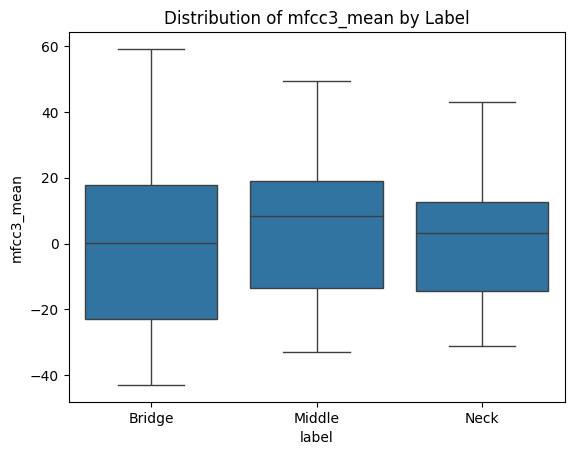

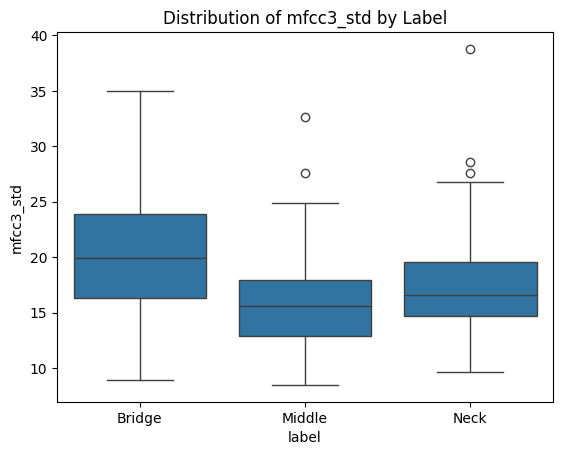

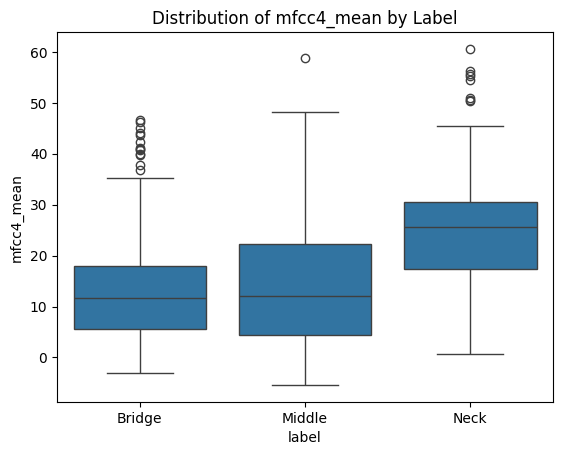

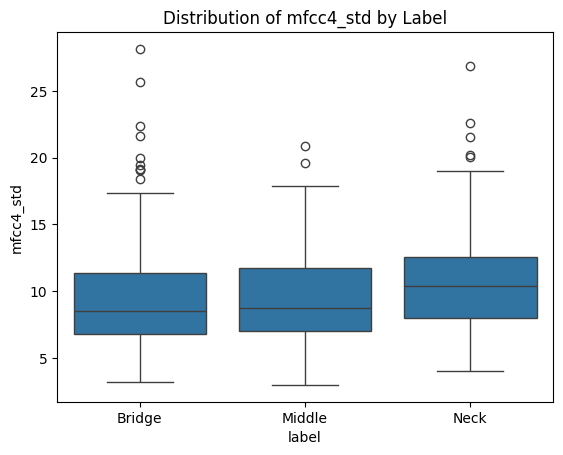

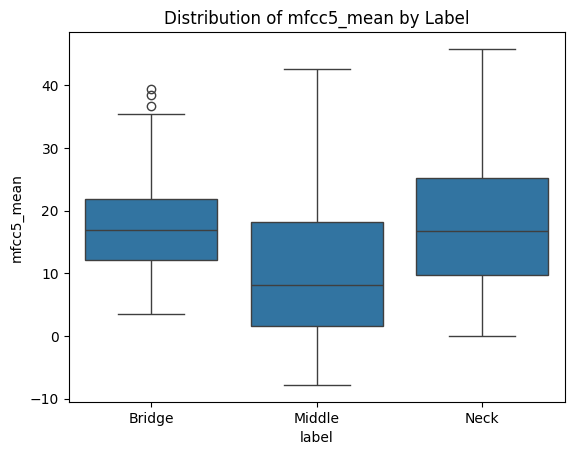

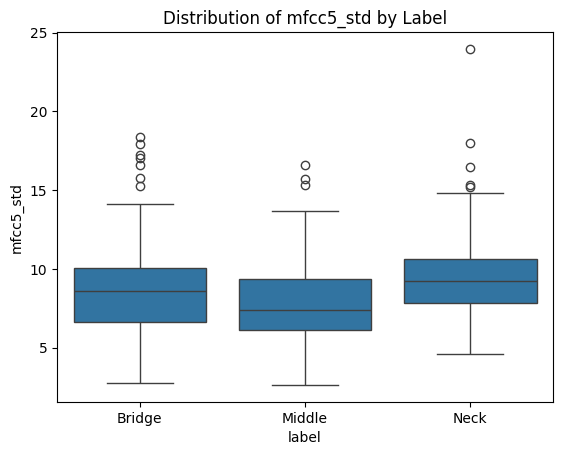

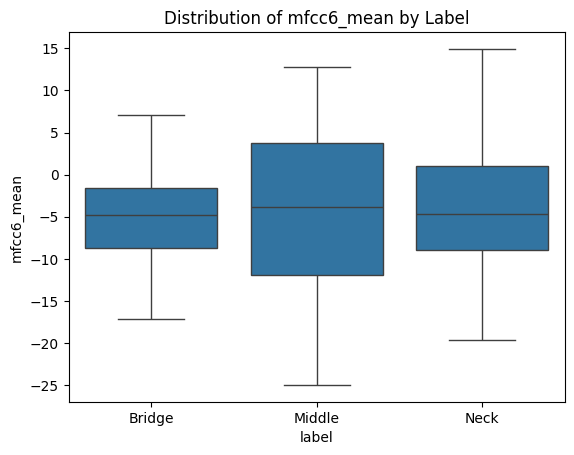

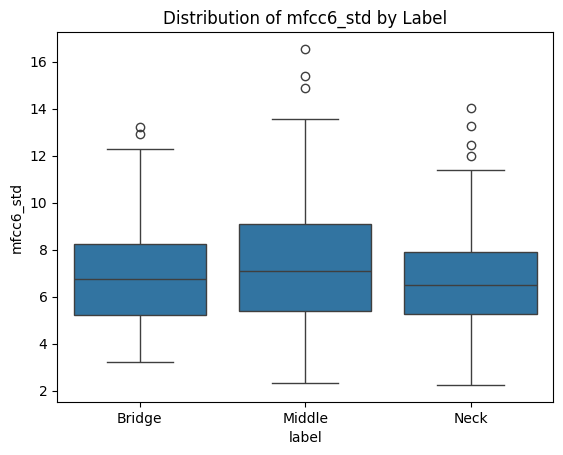

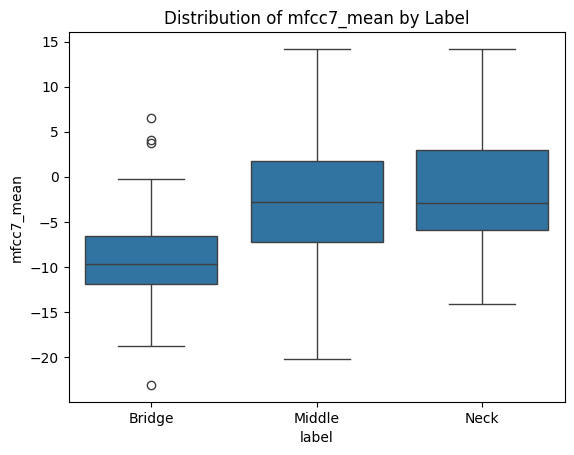

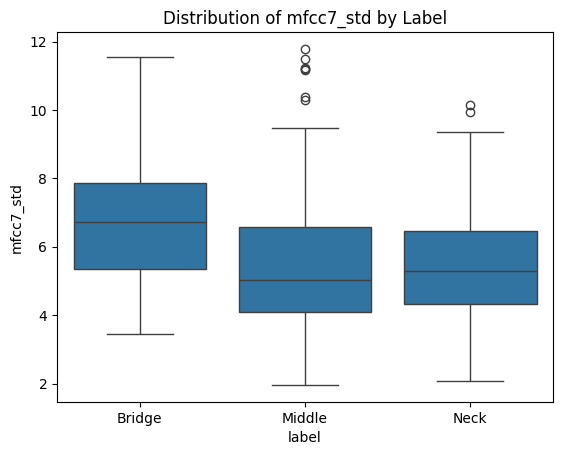

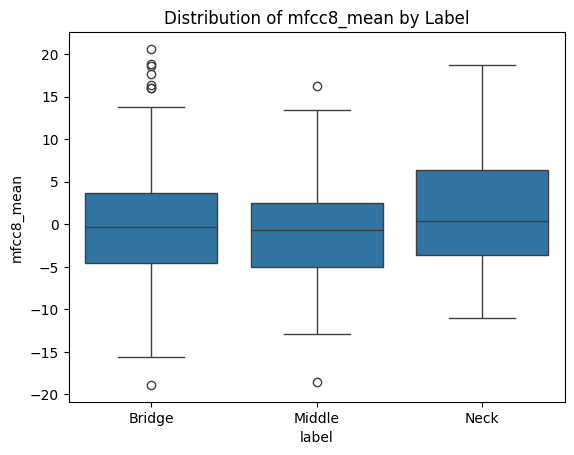

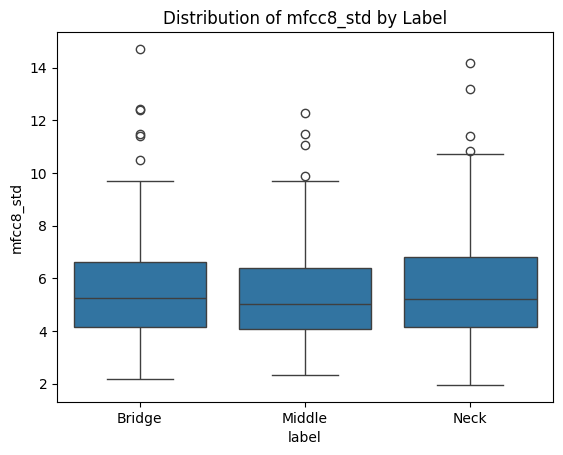

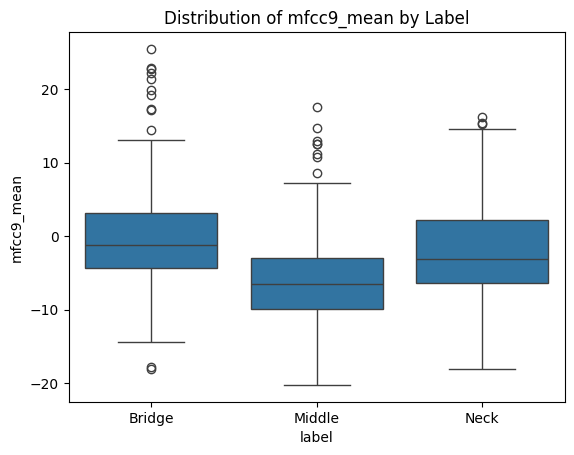

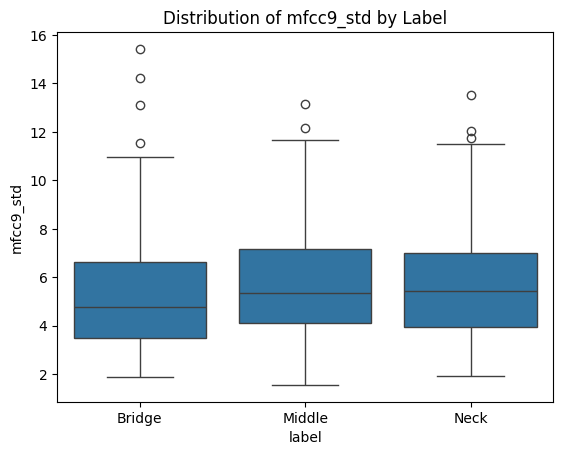

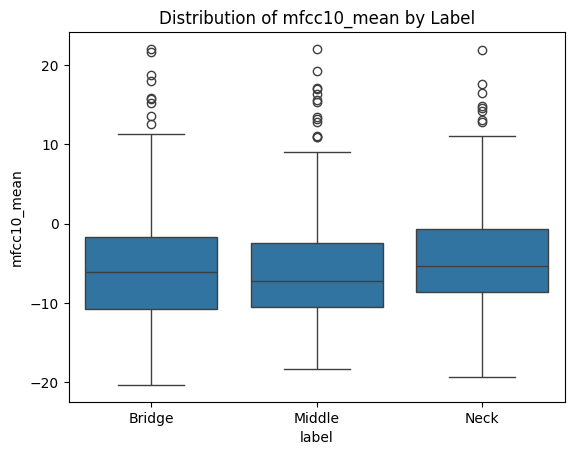

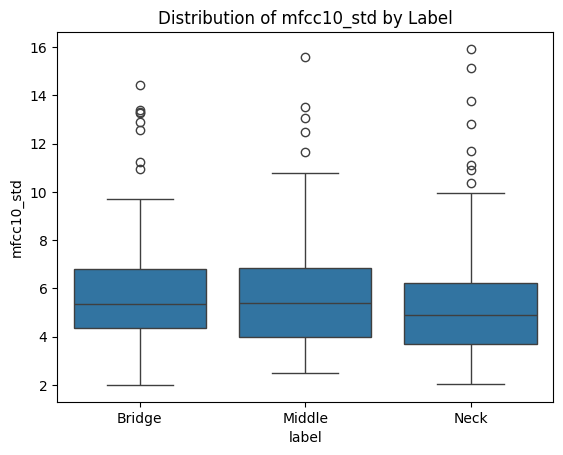

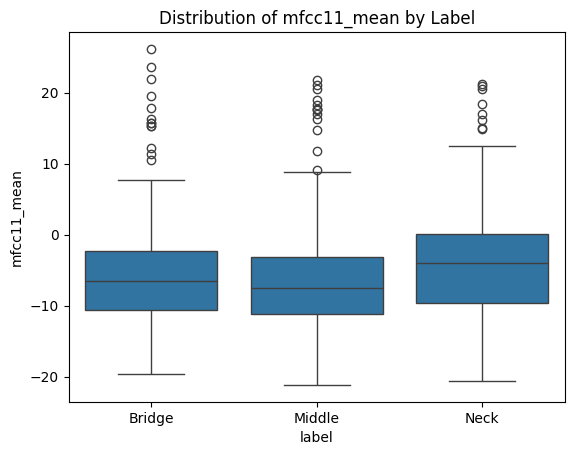

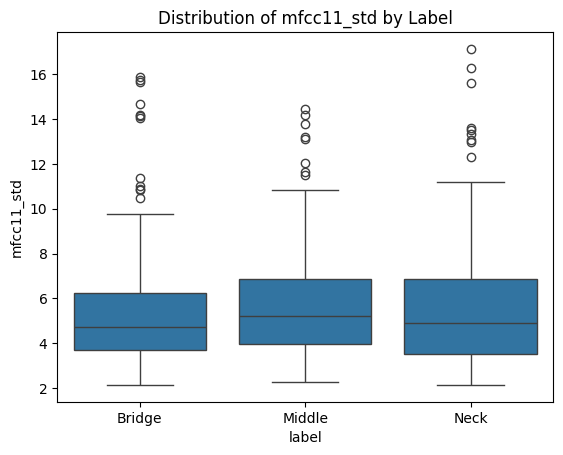

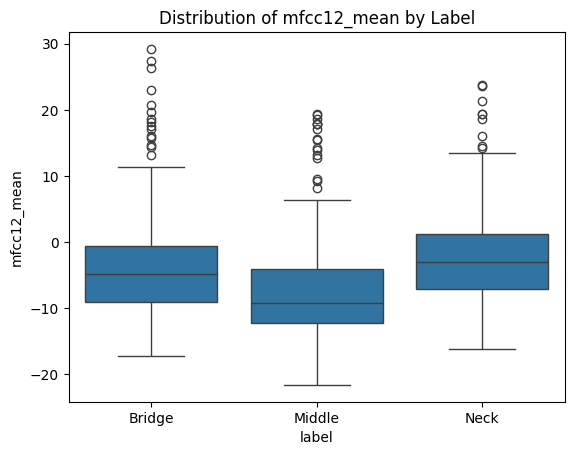

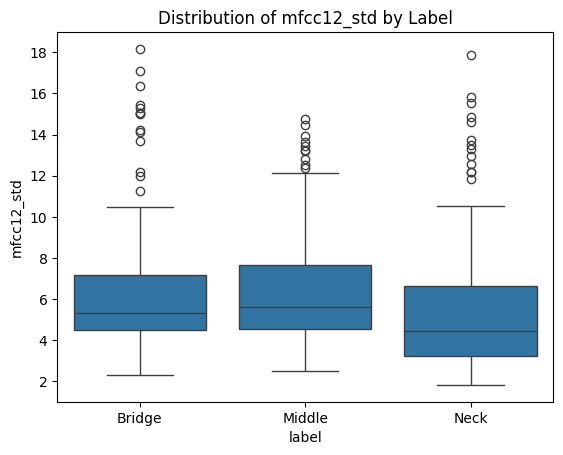

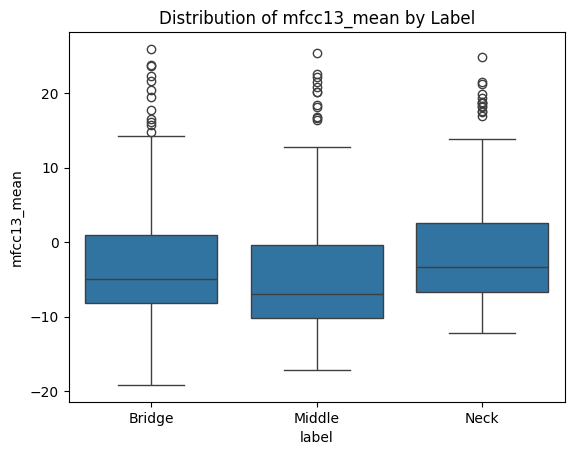

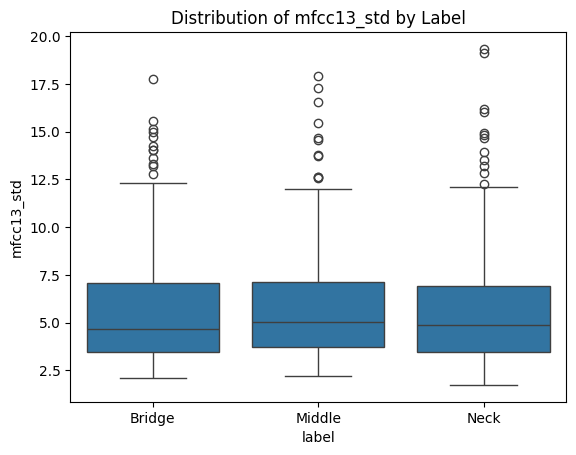

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt='.2f', cmap='Purples',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

# Plot distribution of features for each label
for feature in X.columns:
    plt.figure()
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Label')
    plt.show()

# Pairplot to visualize relationships between features
#sns.pairplot(df, hue='label', vars=X.columns)
#plt.show()


# Feature Evaluation

In [ ]:
# Feature selection using chi-squared test
X_non_negative = X.abs()  # Convert negative values to positive
selector = SelectKBest(chi2, k=10)  # Select top k features

X_new = selector.fit_transform(X_non_negative, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]
print("Selected features:", selected_features_names)

# Get the names of the eliminated features
eliminated_features_names = [col for col in X.columns if col not in selected_features_names]
print("Eliminated features:", eliminated_features_names)


Selected features: Index(['spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_bandwidth_mean', 'spectral_bandwidth_std',
       'spectral_rolloff_mean', 'spectral_rolloff_std', 'mfcc1_mean',
       'mfcc1_std', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean',
       'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc9_mean', 'mfcc12_mean',
       'mfcc13_mean'],
      dtype='object')
Eliminated features: ['zero_crossing_rate_mean', 'zero_crossing_rate_std', 'chroma_stft_mean', 'chroma_stft_std', 'chroma_cens_mean', 'chroma_cens_std', 'chroma_cqt_mean', 'chroma_cqt_std', 'spectral_contrast_mean', 'spectral_contrast_std', 'spectral_flatness_mean', 'spectral_flatness_std', 'tonnetz_mean', 'tonnetz_std', 'mfcc2_std', 'mfcc4_std', 'mfcc5_std', 'mfcc6_std', 'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_std', 'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_std', 'mfcc13_std']


# Training 2

In [ ]:
#df = df.drop(columns = eliminated_features_names)
selected_feature_names = selected_features_names.append(pd.Index(['label']))

# Ensure there are no discrepancies by stripping any potential whitespace
selected_feature_names = [name.strip() for name in selected_feature_names]

df2 = df[selected_feature_names]

# Save the DataFrame to a CSV file
df2.to_csv("drive/MyDrive/Guitar Pickup Audio Files/Clean/audio_features_optimized.csv", index=False)

# Load the data from the CSV file
df2 = pd.read_csv("drive/MyDrive/Guitar Pickup Audio Files/Clean/audio_features_optimized.csv")

# Split the data into training and testing sets
X = df2 = df2.drop("label", axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[24  7  5]
 [ 3 19  0]
 [ 3  0 22]]
              precision    recall  f1-score   support

      Bridge       0.80      0.67      0.73        36
      Middle       0.73      0.86      0.79        22
        Neck       0.81      0.88      0.85        25

    accuracy                           0.78        83
   macro avg       0.78      0.80      0.79        83
weighted avg       0.79      0.78      0.78        83



#Plot 2

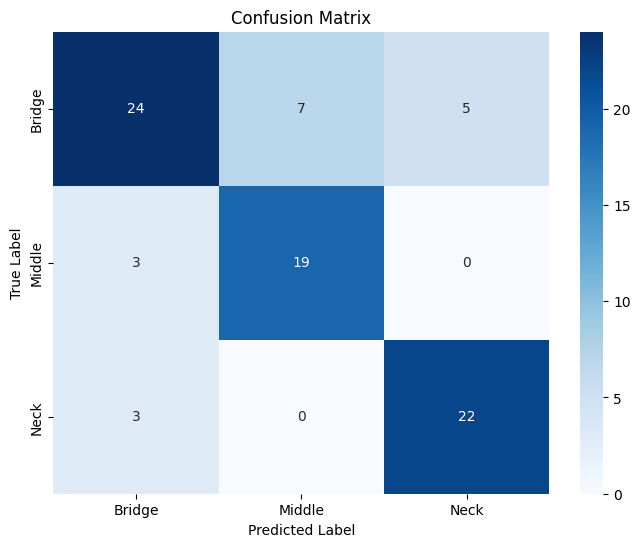

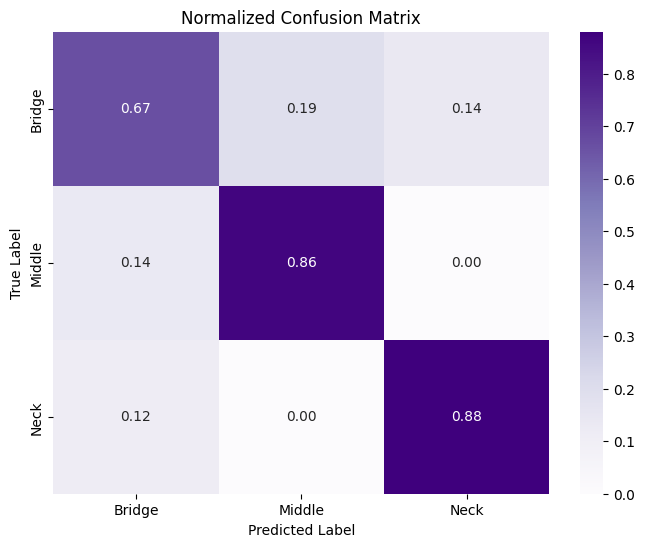

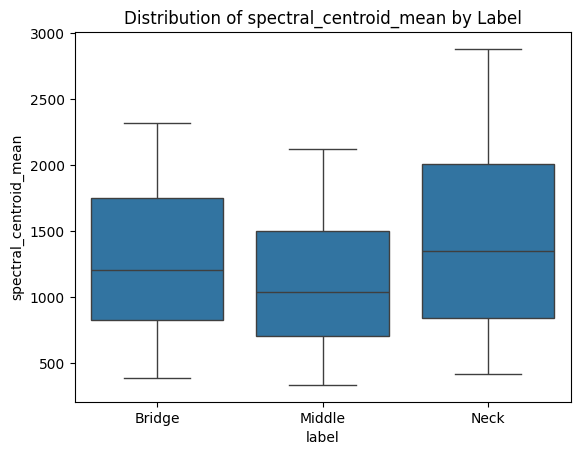

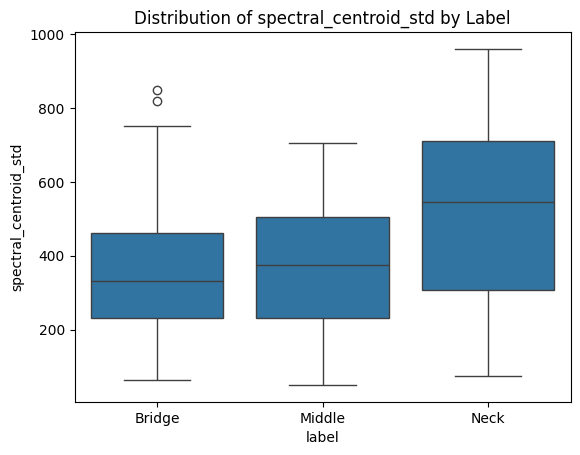

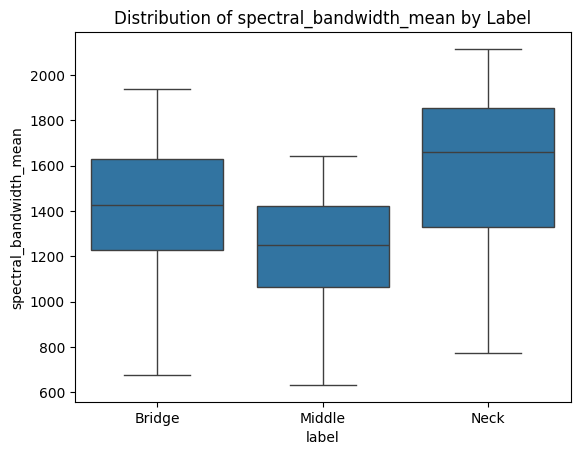

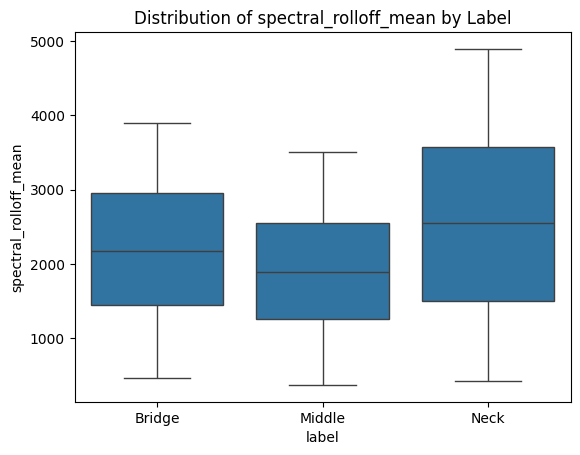

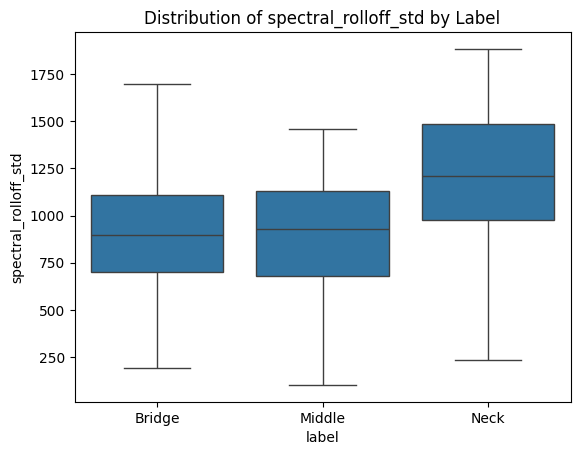

In [ ]:
# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt='.2f', cmap='Purples',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()


# Plot distribution of features for each label using Seaborn
for feature in X.columns:
    plt.figure()
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Label')
    plt.show()

# Evaluation training 3

In [ ]:
# Feature selection using chi-squared test
X_non_negative = X.abs()  # Convert negative values to positive
selector = SelectKBest(chi2, k=3)  # Select top k features

X_new = selector.fit_transform(X_non_negative, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]
print("Selected features:", selected_features_names)

# Get the names of the eliminated features
eliminated_features_names = [col for col in X.columns if col not in selected_features_names]
print("Eliminated features:", eliminated_features_names)

# Split data with selected features
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train kNN classifier with selected features
knn_new = KNeighborsClassifier(n_neighbors=5)
knn_new.fit(X_train_new, y_train)

# Predict on test set
y_pred_new = knn_new.predict(X_test_new)

# Evaluate performance with selected features
print(classification_report(y_test, y_pred_new))
print(confusion_matrix(y_test, y_pred_new))


Selected features: Index(['spectral_bandwidth_mean', 'spectral_rolloff_mean',
       'spectral_rolloff_std'],
      dtype='object')
Eliminated features: ['spectral_centroid_mean', 'spectral_centroid_std']
              precision    recall  f1-score   support

      Bridge       0.67      0.61      0.64        36
      Middle       0.68      0.77      0.72        22
        Neck       0.72      0.72      0.72        25

    accuracy                           0.69        83
   macro avg       0.69      0.70      0.69        83
weighted avg       0.69      0.69      0.69        83

[[22  8  6]
 [ 4 17  1]
 [ 7  0 18]]


# Plot 3

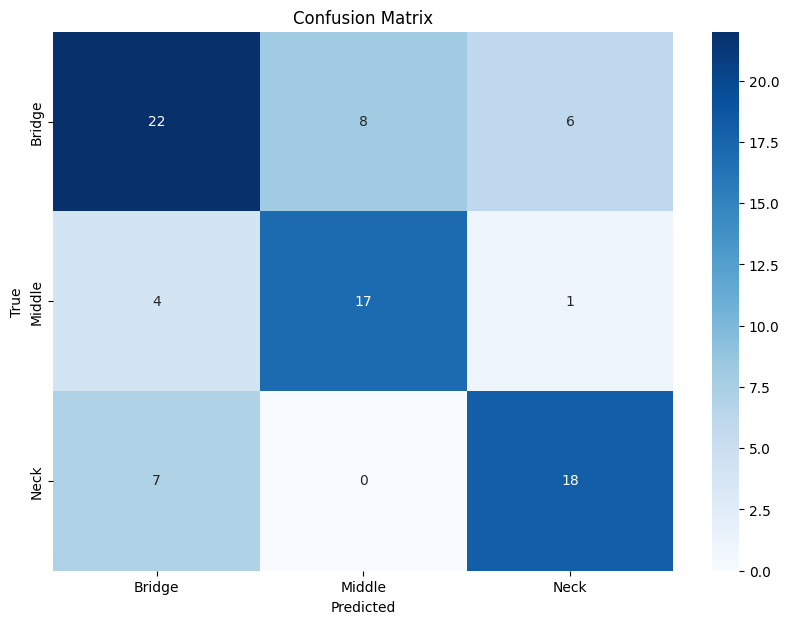

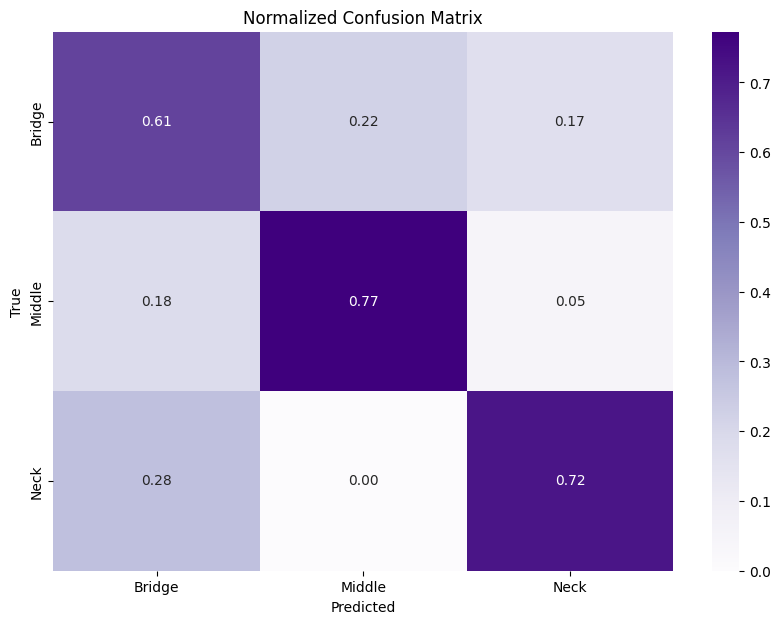

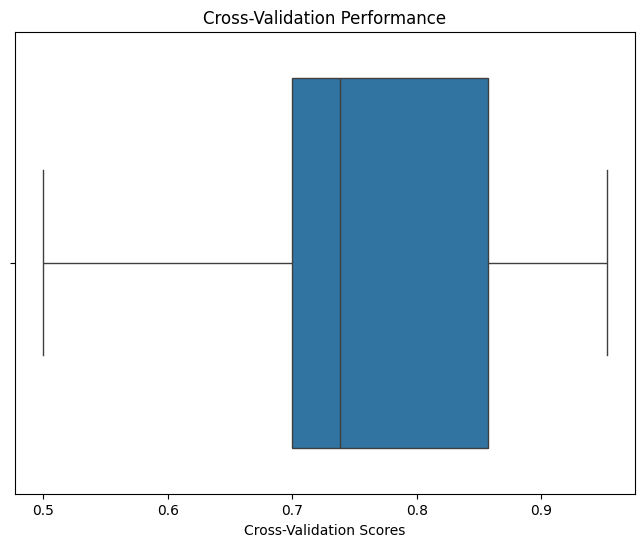

In [ ]:
# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt='d', cmap='Blues', xticklabels=knn_new.classes_, yticklabels=knn_new.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_new,normalize='true'), annot=True, fmt='.2f', cmap='Purples', xticklabels=knn_new.classes_, yticklabels=knn_new.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Distribution of Features (example)
#sns.pairplot(df, hue='label', vars=['chroma_stft_mean', 'mfcc_mean', 'spectral_centroid_mean'])
#plt.suptitle('Distribution of Features by Label', y=1.02)
#plt.show()

# Cross-Validation Scores
cv_scores = cross_val_score(knn_new, X, y, cv=20)
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.xlabel('Cross-Validation Scores')
plt.title('Cross-Validation Performance')
plt.show()
